# Arithmetic with Images

In [2]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

### Image addition and subtraction

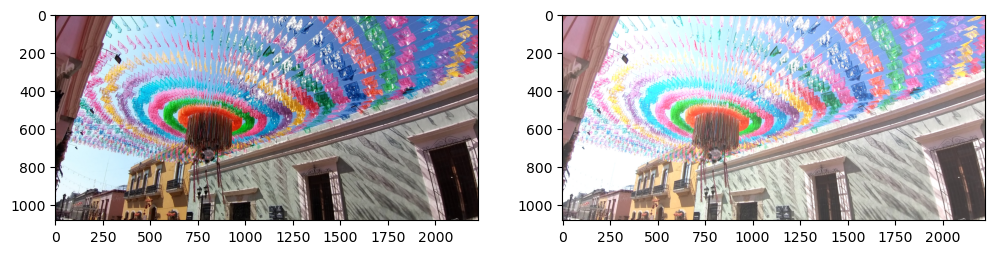

In [3]:
image = cv2.imread('../datasets/flags.jpg')

M = np.ones(image.shape, dtype="uint8") * 60

image_added = cv2.add(image, M)


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image[:,:,::-1])

plt.subplot(1,2,2)
plt.imshow(image_added[:,:,::-1])

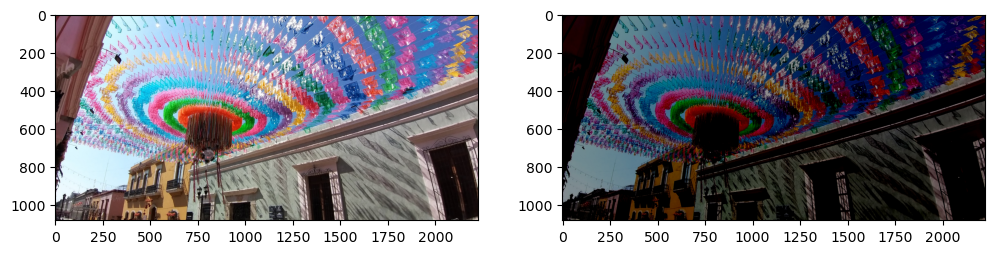

In [4]:
scalar = np.ones((1, 1), dtype="float") * 110

image_added_2 = cv2.add(image, -scalar)

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(image[:,:,::-1])

plt.subplot(1,2,2)
plt.imshow(image_added_2[:,:,::-1])

### Image blending

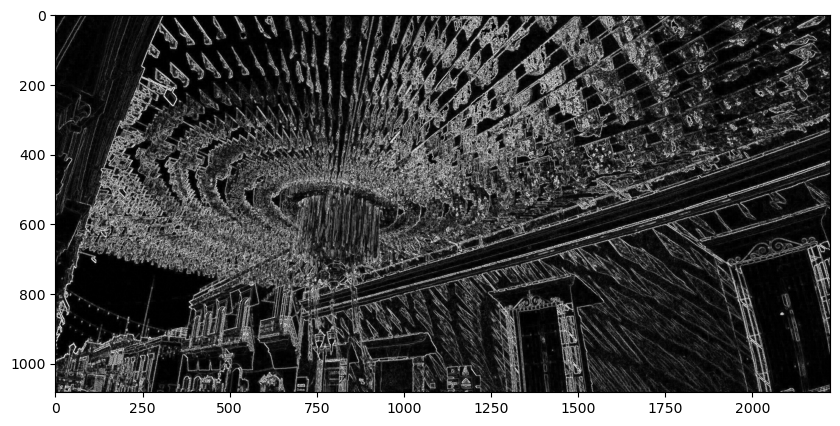

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gradient_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0, 3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1, 3)

# Conversion to an unsigned 8-bit type:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

sobel_image = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

plt.figure(figsize=(10,8))

plt.imshow(sobel_image, cmap='gray')

### Bitwise operations


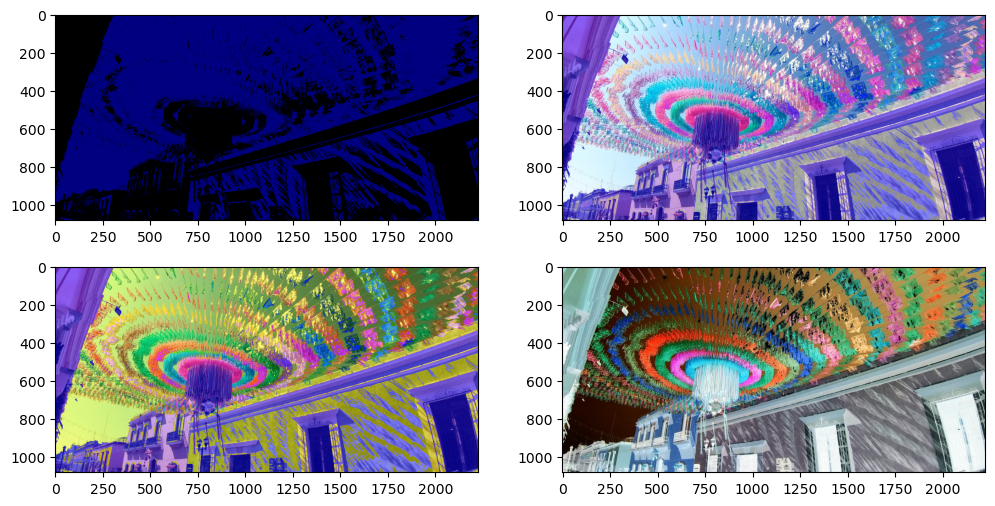

In [22]:
thres, im = cv2.threshold(sobel_image, 128, 255, cv2.THRESH_BINARY)

bitwise_and = cv2.bitwise_and(image, thres)
bitwise_or = cv2.bitwise_or(image, thres)
bitwise_xor = cv2.bitwise_xor(image, thres)
bitwise_not = cv2.bitwise_not(image, thres)

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(bitwise_and[:,:,::-1])

plt.subplot(2,2,2)
plt.imshow(bitwise_or[:,:,::-1])

plt.subplot(2,2,3)
plt.imshow(bitwise_xor[:,:,::-1])

plt.subplot(2,2,4)
plt.imshow(bitwise_not[:,:,::-1])